In [3]:
try:
    from Bio import AlignIO
    from Bio.Align import AlignInfo
except ModuleNotFoundError:
    print("Biopython is not installed or cannot be imported.")
    print("Please install Biopython using: pip install biopython")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def calculate_identity(alignment):
    summary = AlignInfo.SummaryInfo(alignment)
    consensus = summary.dumb_consensus()
    alignment_len = alignment.get_alignment_length()
    
    identities = []
    for record in alignment:
        seq = str(record.seq)
        identity = sum(1 for a, b in zip(seq, consensus) if a == b) / alignment_len * 100
        identities.append((record.id, len(seq), identity))
    
    return identities

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment:
        print(f"Alignment loaded from file: {alignment_file}")
        print(f"Alignment length: {alignment.get_alignment_length()}")

        identities = calculate_identity(alignment)
        for record_id, seq_len, identity in identities:
            print(f"Sequence {record_id}: Length = {seq_len}, Identity = {identity:.2f}%")

        # Print sequences and their IDs
        for record in alignment:
            print(f">{record.id}")
            print(record.seq)
            print()  # Print an empty line for separation
    else:
        print("Failed to load the alignment.")

if __name__ == "__main__":
    main()

Alignment loaded from file: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Alignment length: 197
Sequence original_humancys: Length = 197, Identity = 76.65%
Sequence original_mousecys: Length = 197, Identity = 75.63%
>original_humancys
PQNRKVDCNKGVTGTIYEYGALTLNGEEYIQFKQFAGKHVLFVNVAAYCGLAAQYPELNALQEELKNFGVIVLAFPCNQFGKQEPGTNSEILLGLKYVCPGSGFVPSFQLFEKGDVNGEKEQKVFTFLKNSCPPTSDLLGSSSQLFWEPMKVHDIRWNFEKFLVGPDGVPVMHWFHQAPVSTVKSDILEYLKQFNTH

>original_mousecys
PQKSKVDCNKGVTGTVYEYGANTIDGGEFVNFQQYAGKHILFVNVASFCGLTATYPELNTLQEELKPFNVTVLGFPCNQFGKQEPGKNSEILLGLKYVRPGGGYVPNFQLFEKGDVNGDNEQKVFSFLKNSCPPTSELFGSPEHLFWDPMKVHDIRWNFEKFLVGPDGVPVMRWFHHTPVRIVQSDIMEYLNQTS--



/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/Bio/Align/AlignInfo.py:63: BiopythonDeprecationWarning: The `dumb_consensus` method is deprecated and will be removed in a future release of Biopython. As an alternative, you can convert the multiple sequence alignment object to a new-style Alignment object by via its `.alignment` property, and then create a Motif object. You can then use the `.consensus` or `.degenerate_consensus` property of the Motif object to get a consensus sequence. For more control over how the consensus sequence is calculated, you can call the `calculate_consensus` method on the `.counts` property of the Motif object. This is an example for a multiple sequence alignment `msa` of DNA nucleotides:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> from Bio.Align.AlignInfo import SummaryInfo
>>> msa = MultipleSeqAlignment([SeqRecord(Seq('ACGT')),
...                             SeqRecord(S

In [4]:
try:
    from Bio import AlignIO
except ModuleNotFoundError:
    print("Biopython is not installed or cannot be imported.")
    print("Please install Biopython using: pip install biopython")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def find_different_positions(seq1, seq2):
    differences = []
    for i, (res1, res2) in enumerate(zip(seq1, seq2)):
        if res1 != res2:
            differences.append((i + 1, res1, res2))  # i + 1 to convert to 1-based position
    return differences

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment and len(alignment) == 2:
        print(f"Alignment loaded from file: {alignment_file}")
        
        seq1 = str(alignment[0].seq)
        seq2 = str(alignment[1].seq)

        # Find positions with different amino acids
        differences = find_different_positions(seq1, seq2)

        if differences:
            print("Differences:")
            for pos, res1, res2 in differences:
                print(f"Position {pos}: Sequence 1 - {res1}, Sequence 2 - {res2}")
        else:
            print("No differences found between the two sequences.")
    else:
        print("Alignment could not be loaded or does not contain exactly two sequences.")

if __name__ == "__main__":
    main()

Alignment loaded from file: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Differences:
Position 3: Sequence 1 - N, Sequence 2 - K
Position 4: Sequence 1 - R, Sequence 2 - S
Position 16: Sequence 1 - I, Sequence 2 - V
Position 22: Sequence 1 - L, Sequence 2 - N
Position 24: Sequence 1 - L, Sequence 2 - I
Position 25: Sequence 1 - N, Sequence 2 - D
Position 27: Sequence 1 - E, Sequence 2 - G
Position 29: Sequence 1 - Y, Sequence 2 - F
Position 30: Sequence 1 - I, Sequence 2 - V
Position 31: Sequence 1 - Q, Sequence 2 - N
Position 33: Sequence 1 - K, Sequence 2 - Q
Position 35: Sequence 1 - F, Sequence 2 - Y
Position 40: Sequence 1 - V, Sequence 2 - I
Position 47: Sequence 1 - A, Sequence 2 - S
Position 48: Sequence 1 - Y, Sequence 2 - F
Position 52: Sequence 1 - A, Sequence 2 - T
Position 54: Sequence 1 - Q, Sequence 2 - T
Position 60: Sequence 1 - A, Sequence 2 - T
Position 67: Sequence 1 - N, Sequence 2 - P
Position 69: Sequence 1 - G, Sequence 2 - N
Po

Alignment loaded from file: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Differences found at positions: [3, 4, 16, 22, 24, 25, 27, 29, 30, 31, 33, 35, 40, 47, 48, 52, 54, 60, 67, 69, 71, 74, 87, 99, 102, 104, 107, 119, 120, 126, 137, 139, 142, 143, 144, 148, 173, 177, 178, 181, 182, 184, 188, 192, 194, 195, 196, 197]
Plot saved to: differences_plot.png


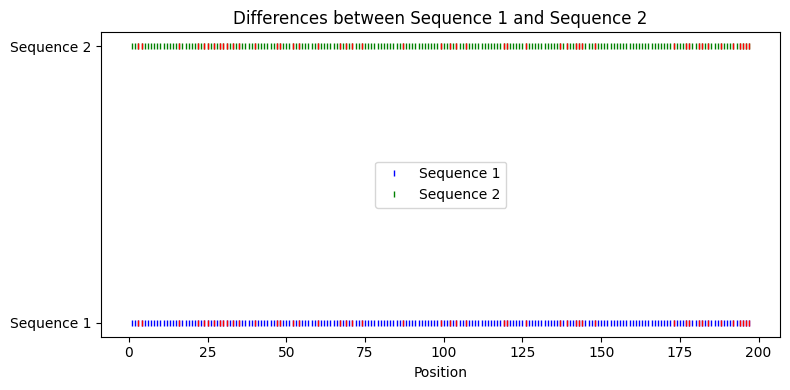

In [5]:
try:
    from Bio import AlignIO
    import matplotlib.pyplot as plt
except ModuleNotFoundError as e:
    print(f"Error importing module: {e}")
    print("Please make sure Biopython and matplotlib are installed.")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def find_different_positions(seq1, seq2):
    differences = []
    for i, (res1, res2) in enumerate(zip(seq1, seq2)):
        if res1 != res2:
            differences.append(i + 1)  # i + 1 to convert to 1-based position
    return differences

def plot_differences(seq1, seq2, differences, output_file=None):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.plot(range(1, len(seq1) + 1), [1] * len(seq1), '|', color='blue', markersize=5, label='Sequence 1')
    ax.plot(range(1, len(seq2) + 1), [2] * len(seq2), '|', color='green', markersize=5, label='Sequence 2')
    
    for pos in differences:
        ax.plot(pos, 1, '|', color='red', markersize=5)
        ax.plot(pos, 2, '|', color='red', markersize=5)
    
    ax.set_yticks([1, 2])
    ax.set_yticklabels(['Sequence 1', 'Sequence 2'])
    ax.set_xlabel('Position')
    ax.set_title('Differences between Sequence 1 and Sequence 2')
    ax.legend(loc='center')  # Center the legend

    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {output_file}")
    else:
        plt.show()

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment and len(alignment) == 2:
        print(f"Alignment loaded from file: {alignment_file}")
        
        seq1 = str(alignment[0].seq)
        seq2 = str(alignment[1].seq)

        # Find positions with different amino acids
        differences = find_different_positions(seq1, seq2)

        if differences:
            print(f"Differences found at positions: {differences}")
            output_file = "differences_plot.png"  # Replace with your desired output file path
            plot_differences(seq1, seq2, differences, output_file)
        else:
            print("No differences found between the two sequences.")
    else:
        print("Alignment could not be loaded or does not contain exactly two sequences.")

if __name__ == "__main__":
    main()

In [50]:
from Bio.PDB import PDBParser

# Define the path to your PDB file
pdb_file = "original_mousecys.pdb"

# Function to print details of residues in chain A
def print_chain_a_residues(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("PDB", pdb_file)

    # Assuming there's only one model (index 0)
    model = structure[0]

    # Print details of residues in chain A
    chain_a = model['A']
    print(f"Residues in Chain A:")
    for residue in chain_a:
        print(f"Residue {residue.id}: {residue.resname}")

# Call the function to print details of chain A residues
print_chain_a_residues(pdb_file)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_29520/2584642600.py", line 21, in <module>
    print_chain_a_residues(pdb_file)
  File "/tmp/ipykernel_29520/2584642600.py", line 15, in print_chain_a_residues
    chain_a = model['A']
  File "/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/Bio/PDB/Entity.py", line 45, in __getitem__
    return self.child_dict[id]
KeyError: 'A'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    retu